# Topic Modeling



### 1. Loading the data

In [1]:
# Mount your Google drive that you can access files located in your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read the files into a data frame using the function read_csv in pandas
import pandas as pd
papers = pd.read_csv('/content/papers.csv',header=0) # the first row will be the header
papers.head()

,id,title
0,1,Self-Organization of Associative Database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...
2,100,Storing Covariance by the Associative Long-Ter...
3,1000,Bayesian Query Construction for Neural Network...
4,1001,Neural Network Ensembles Cross Validation an...


### 2. Text cleaning

In [3]:
# Here we do one simple text cleaning: convert all titles into lowercases.
# We append a new column called 'processed_title'

papers['processed_title'] = papers['title'].map(lambda x:x.lower())

papers.head()

,id,title,processed_title
0,1,Self-Organization of Associative Database and ...,self-organization of associative database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,a mean field theory of layer iv of visual cort...
2,100,Storing Covariance by the Associative Long-Ter...,storing covariance by the associative long-ter...
3,1000,Bayesian Query Construction for Neural Network...,bayesian query construction for neural network...
4,1001,Neural Network Ensembles Cross Validation an...,neural network ensembles cross validation an...


### 3. Exploratory Data Analysis


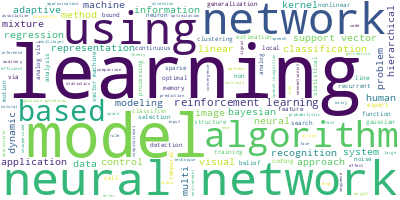

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['processed_title'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### 4. Topic Modeling (LDA) Analysis

#### 4.1 Import libraries

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 4.2 Tokenization

In [6]:
# Convert a document/sentence into a list of lowercase tokens, ignoring tokens that are too short or too long.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

#### 4.3 Stopwords removal

In [7]:
# remove english stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # expand the stop word list by adding these customized words

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [8]:
# form a list where each element is a title
data = papers.processed_title.values.tolist()

# remove stop words and convert each title into a list of words
data_words = remove_stopwords(data)
print(data_words[0])
print(data_words[2])

['self', 'organization', 'associative', 'database', 'applications']
['storing', 'covariance', 'associative', 'long', 'term', 'potentiation', 'depression', 'synaptic', 'strengths', 'hippocampus']


###5. Term document freqency

In [12]:
import gensim.corpora as corpora

#create dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: a collection of documents and each document is a list of words
texts = data_words

# Convert each document into a bag-of-words (BoW) format = a list of (token_id, token_count) tuples.
corpus = [id2word.doc2bow(text) for text in texts]

In [13]:
print(corpus[10])
print(texts[10])

[(33, 1), (60, 1), (61, 1), (62, 1)]
['learning', 'play', 'game', 'chess']


###6. Training the model

In [72]:
from pprint import pprint
import numpy as np

# number of topics
K = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=K,alpha='asymmetric',eta=0.01)

In [73]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.028*"learning" + 0.013*"networks" + 0.011*"algorithm" + 0.010*"neural" + 0.010*"using" + 0.010*"models" + 0.009*"bayesian" + 0.008*"regression" + 0.008*"network" + 0.008*"vector"'), (1, '0.041*"neural" + 0.026*"networks" + 0.019*"using" + 0.013*"visual" + 0.012*"network" + 0.011*"analog" + 0.010*"learning" + 0.009*"recognition" + 0.009*"approach" + 0.009*"data"'), (2, '0.040*"model" + 0.040*"learning" + 0.028*"neural" + 0.027*"networks" + 0.010*"reinforcement" + 0.010*"using" + 0.009*"data" + 0.008*"control" + 0.008*"visual" + 0.006*"vector"'), (3, '0.038*"learning" + 0.024*"adaptive" + 0.024*"neural" + 0.024*"network" + 0.021*"using" + 0.014*"networks" + 0.012*"visual" + 0.012*"reinforcement" + 0.012*"analysis" + 0.010*"take"'), (4, '0.035*"learning" + 0.030*"models" + 0.017*"based" + 0.015*"using" + 0.015*"memory" + 0.015*"gaussian" + 0.012*"networks" + 0.012*"linear" + 0.010*"control" + 0.010*"data"'), (5, '0.037*"using" + 0.024*"learning" + 0.021*"vector" + 0.021*"networks"

### 7. Model Output

In [74]:
doc_lda = lda_model[corpus]

# iterate through documents/titles
for i in range(len(texts)):
  docbow = corpus[i] # get the document BoW
  doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0) # Return topic distribution for the given document BoW, as a list of (topic_id, topic_probability) 2-tuples.
  doc_topic_prob = np.array([v[1] for v in doc_topics]) # convert it into a numpy array
  print('paper:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1)

paper: 1 , dominant topic: 6
paper: 2 , dominant topic: 2
paper: 3 , dominant topic: 1
paper: 4 , dominant topic: 1
paper: 5 , dominant topic: 10
paper: 6 , dominant topic: 2
paper: 7 , dominant topic: 4
paper: 8 , dominant topic: 8
paper: 9 , dominant topic: 1
paper: 10 , dominant topic: 3
paper: 11 , dominant topic: 3
paper: 12 , dominant topic: 2
paper: 13 , dominant topic: 2
paper: 14 , dominant topic: 3
paper: 15 , dominant topic: 10
paper: 16 , dominant topic: 10
paper: 17 , dominant topic: 8
paper: 18 , dominant topic: 3
paper: 19 , dominant topic: 3
paper: 20 , dominant topic: 4
paper: 21 , dominant topic: 2
paper: 22 , dominant topic: 5
paper: 23 , dominant topic: 1
paper: 24 , dominant topic: 7
paper: 25 , dominant topic: 9
paper: 26 , dominant topic: 3
paper: 27 , dominant topic: 1
paper: 28 , dominant topic: 3
paper: 29 , dominant topic: 10
paper: 30 , dominant topic: 9
paper: 31 , dominant topic: 3
paper: 32 , dominant topic: 3
paper: 33 , dominant topic: 3
paper: 34 , dom

In [75]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -8.662082611085093
